In [35]:
# import os
# os.chdir('../')

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scr.util import *

# Gradient Boosting Dicision Tree

In [37]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [38]:
# 目的変数

df_train['ProdTaken'].value_counts()

ProdTaken
0    2992
1     497
Name: count, dtype: int64

In [39]:
df_train.isna().sum()

id                          0
Age                       100
TypeofContact               6
CityTier                    0
DurationOfPitch           121
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          33
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              22
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              56
customer_info               0
ProdTaken                   0
dtype: int64

In [40]:
df_test.isna().sum()

id                          0
Age                        93
TypeofContact              12
CityTier                    0
DurationOfPitch           131
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          24
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              42
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              49
customer_info               0
dtype: int64

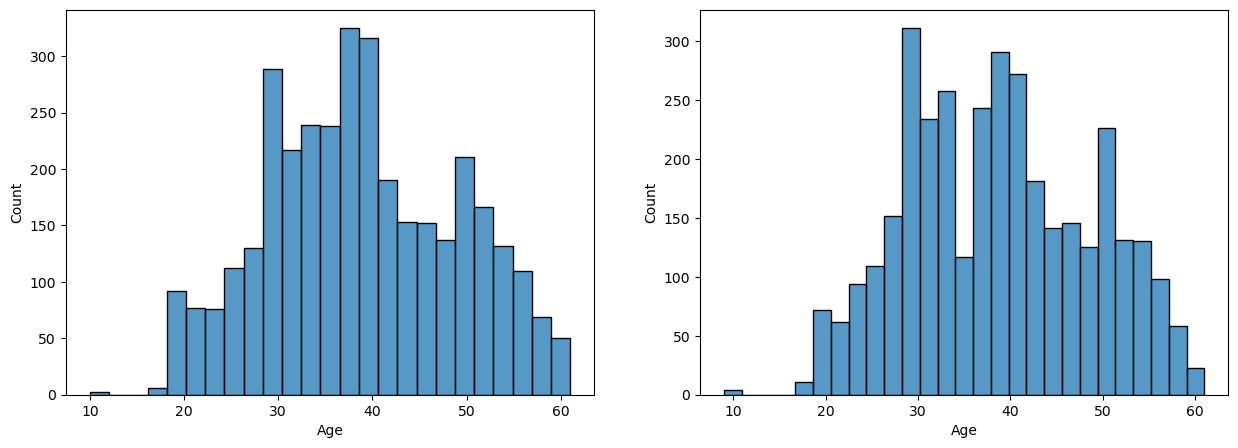

In [41]:
# Age Normalization
# 年齢

df_train['Age'] = df_train['Age'].astype(str).apply(japanese_to_int)
df_test['Age'] = df_test['Age'].astype(str).apply(japanese_to_int)

tmp = df_train[~(df_train['Age'] == 0)]
df_train.loc[df_train['Age'] == 0, 'Age'] = tmp['Age'].median()

tmp = df_test[~(df_test['Age'] == 0)]
df_test.loc[df_test['Age'] == 0, 'Age'] = tmp['Age'].median()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_list = [df_train, df_test]
for i, df in enumerate(df_list):
    sns.histplot(df['Age'], ax=axes[i])

In [42]:
# TypeofContact Normalization
# 顧客への連絡・接触方法
# 欠損値意味アリ

df_train['TypeofContact'] = df_train['TypeofContact'].fillna('No')
df_test['TypeofContact'] = df_test['TypeofContact'].fillna('No')

print('Train', df_train['TypeofContact'].unique())
print('Test', df_test['TypeofContact'].unique())
display(df_train.groupby(by=['TypeofContact'])['ProdTaken'].agg(['mean', ('count')]))

Train ['Self Enquiry' 'Company Invited' 'No']
Test ['Self Enquiry' 'Company Invited' 'No']


,mean,count
TypeofContact,,
Company Invited,0.182312,1289
No,0.000000,6
Self Enquiry,0.119417,2194


In [43]:
# CityTier Normalization
# 都市層(1>2>3)

print('Train', df_train['CityTier'].unique())
print('Test', df_test['CityTier'].unique())
display(df_train.groupby(by=['CityTier'])['ProdTaken'].agg(['mean', 'count']))

Train [2 1 3]
Test [2 1 3]


,mean,count
CityTier,,
1,0.111864,1475
2,0.168546,1596
3,0.150718,418


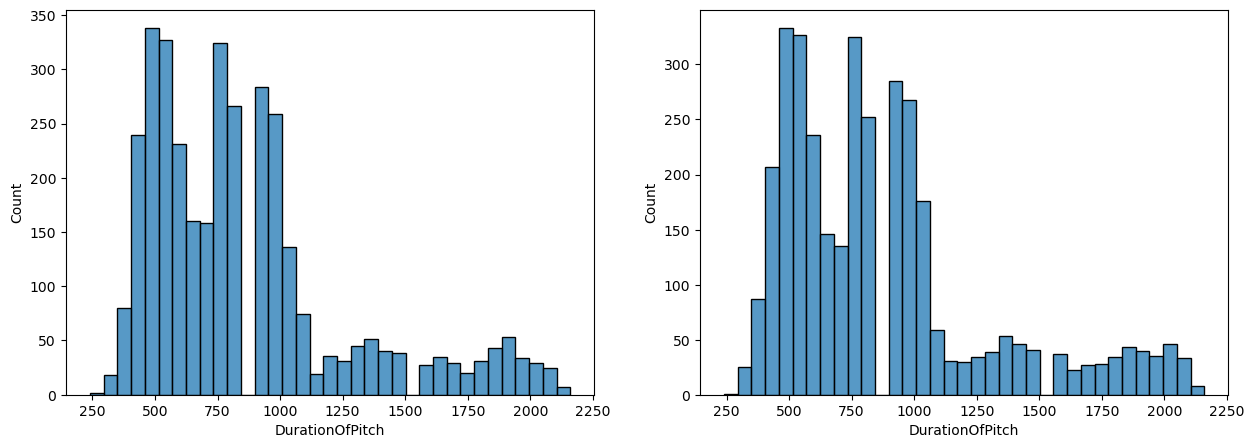

In [44]:
# DurationOfPitch Normalization
# 営業担当者による顧客への商品セールス時間

df_train['DurationOfPitch'] = df_train['DurationOfPitch'].dropna().apply(convert_to_second)
df_test['DurationOfPitch'] = df_test['DurationOfPitch'].dropna().apply(convert_to_second)

df_train['DurationOfPitch'] = df_train['DurationOfPitch'].fillna(df_train['DurationOfPitch'].median())
df_test['DurationOfPitch'] = df_test['DurationOfPitch'].fillna(df_test['DurationOfPitch'].median())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_list = [df_train, df_test]
for i, df in enumerate(df_list):
    sns.histplot(df['DurationOfPitch'], ax=axes[i])

In [45]:
# Occupation Normalization
# 顧客の職業

print('Train', df_train['Occupation'].unique())
print('Test', df_test['Occupation'].unique())
display(df_train.groupby(by=['Occupation'])['ProdTaken'].agg(['mean', 'count']))

Train ['Large Business' 'Salaried' 'Small Business']
Test ['Small Business' 'Salaried' 'Large Business']


,mean,count
Occupation,,
Large Business,0.227147,361
Salaried,0.102070,1401
Small Business,0.157499,1727


In [46]:
# Gender Normalization
# 顧客の性別

df_train['Gender'] = df_train['Gender'].apply(normalize_gender)
df_test['Gender'] = df_test['Gender'].apply(normalize_gender)
display(df_train.groupby(by=['Gender'])['ProdTaken'].agg(['mean', 'count']))

,mean,count
Gender,,
female,0.109968,1264
male,0.160899,2225


In [47]:
# NumberOfPersonVisiting Normalization
# 予定している旅行の同行者の数

print('Train', df_train['NumberOfPersonVisiting'].unique())
print('Test', df_test['NumberOfPersonVisiting'].unique())
display(df_train.groupby(by=['NumberOfPersonVisiting'])['ProdTaken'].agg(['mean', 'count']))

Train [1. 2. 3. 4.]
Test [1. 2. 3. 4.]


,mean,count
NumberOfPersonVisiting,,
1.0,0.247024,336
2.0,0.152363,1608
3.0,0.115468,1377
4.0,0.059524,168


In [48]:
# NumberOfFollowups Normalization
# セールス後に営業担当者が行ったフォローアップの回数

df_train['NumberOfFollowups'] = df_train['NumberOfFollowups'].apply(lambda x: x if x < 100 else x / 100)
df_test['NumberOfFollowups'] = df_test['NumberOfFollowups'].apply(lambda x: x if x < 100 else x / 100)

display(df_train.groupby(by=['NumberOfFollowups'])['ProdTaken'].agg(['mean', 'count']))
display(df_train[df_train['NumberOfFollowups'].isna()]['ProdTaken'].value_counts())

# 欠損値意味アリ
df_train['NumberOfFollowups'] = df_train['NumberOfFollowups'].fillna(0)
df_test['NumberOfFollowups'] = df_test['NumberOfFollowups'].fillna(0)

display(df_train.groupby(by=['NumberOfFollowups'])['ProdTaken'].agg(['mean', 'count']))

,mean,count
NumberOfFollowups,,
1.0,0.128205,78
2.0,0.055556,108
3.0,0.166667,1296
4.0,0.133948,1411
5.0,0.114504,524
6.0,0.358974,39


ProdTaken
0    31
1     2
Name: count, dtype: int64

,mean,count
NumberOfFollowups,,
0.0,0.060606,33
1.0,0.128205,78
2.0,0.055556,108
3.0,0.166667,1296
4.0,0.133948,1411
5.0,0.114504,524
6.0,0.358974,39


In [49]:
# ProductPitched Normalization
# 営業担当者のセールスした商品の種類

df_train['ProductPitched'] = df_train['ProductPitched'].apply(normalize_product_pitched_1)
df_train['ProductPitched'] = df_train['ProductPitched'].apply(normalize_product_pitched_2)
df_test['ProductPitched'] = df_test['ProductPitched'].apply(normalize_product_pitched_1)
df_test['ProductPitched'] = df_test['ProductPitched'].apply(normalize_product_pitched_2)

print('Train', df_train['ProductPitched'].unique())
print('Test', df_test['ProductPitched'].unique())
display(df_train.groupby(by=['ProductPitched'])['ProdTaken'].agg(['mean', 'count']))

Train ['Basic' 'Standard' 'Deluxe' 'Super Deluxe' 'King']
Test ['Super Deluxe' 'Standard' 'Basic' 'Deluxe' 'King']


,mean,count
ProductPitched,,
Basic,0.303371,1157
Deluxe,0.046426,1357
King,0.055556,126
Standard,0.090369,841
Super Deluxe,0.000000,8


In [50]:
# PreferredPropertyStar Normalization
# 顧客の希望するホテルのランク

print('Train', df_train['PreferredPropertyStar'].unique())
print('Test', df_test['PreferredPropertyStar'].unique())
display(df_train.groupby(by=['PreferredPropertyStar'])['ProdTaken'].agg(['mean', 'count']))

Train [3. 4. 5.]
Test [3. 4. 5.]


,mean,count
PreferredPropertyStar,,
3.0,0.139264,2147
4.0,0.158079,1145
5.0,0.086294,197


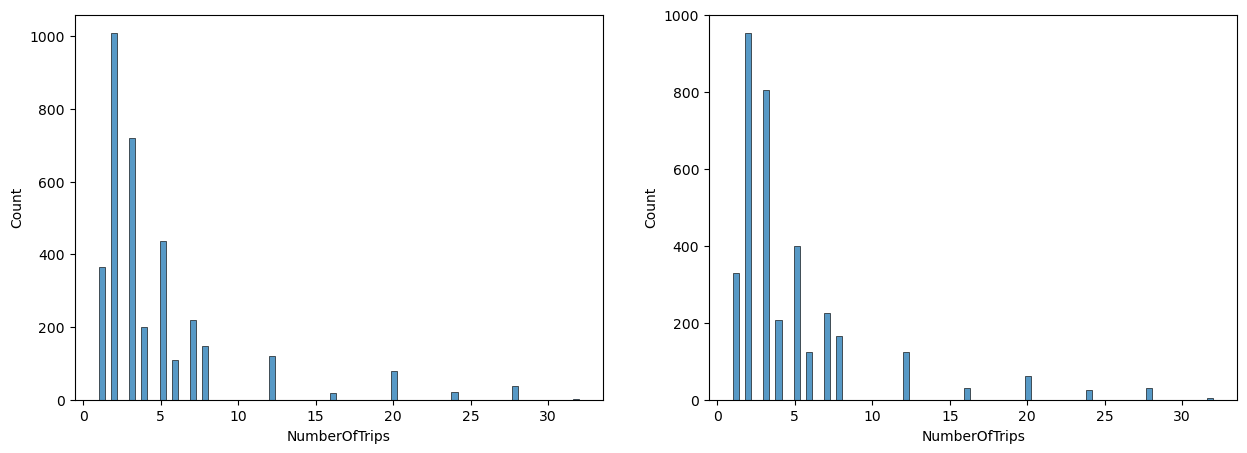

In [51]:
# NumberOfTrips Normalization
# 顧客の年間旅行数
# 他のカラムと相関関係？

df_train['NumberOfTrips'] = df_train['NumberOfTrips'].apply(normalize_trips)
df_test['NumberOfTrips'] = df_test['NumberOfTrips'].apply(normalize_trips)
df_train.loc[df_train['NumberOfTrips'] == 'nan', 'NumberOfTrips'] = df_train['NumberOfTrips'].median()
df_test.loc[df_test['NumberOfTrips'] == 'nan', 'NumberOfTrips'] = df_test['NumberOfTrips'].median()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_list = [df_train, df_test]
for i, df in enumerate(df_list):
    sns.histplot(df['NumberOfTrips'], ax=axes[i])

In [52]:
# Passport Normalization
# パスポートの所持(0: 不所持、1: 所持)

print('Train', df_train['Passport'].unique())
print('Test', df_test['Passport'].unique())
display(df_train.groupby(by=['Passport'])['ProdTaken'].agg(['mean', 'count']))

Train [1 0]
Test [0 1]


,mean,count
Passport,,
0,0.119451,3131
1,0.343575,358


In [53]:
# PitchSatisfactionScore Normalization
# 営業担当者のセールストークに対する顧客の満足度

print('Train', df_train['PitchSatisfactionScore'].unique())
print('Test', df_test['PitchSatisfactionScore'].unique())
display(df_train.groupby(by=['PitchSatisfactionScore'])['ProdTaken'].agg(['mean', 'count']))

Train [4 5 3 2 1]
Test [3 4 5 2 1]


,mean,count
PitchSatisfactionScore,,
1,0.080175,686
2,0.174941,1269
3,0.141618,692
4,0.151556,739
5,0.097087,103


In [54]:
# Designation Normalization
# 顧客の役職

df_train['Designation'] = df_train['Designation'].apply(normalize_designation_1)
df_train['Designation'] = df_train['Designation'].apply(normalize_designation_2)
df_test['Designation'] = df_test['Designation'].apply(normalize_designation_1)
df_test['Designation'] = df_test['Designation'].apply(normalize_designation_2)

print('Train', df_train['Designation'].unique())
print('Test', df_test['Designation'].unique())
display(df_train.groupby(by=['Designation'])['ProdTaken'].agg(['mean', 'count']))

Train ['Executive' 'Senior Manager' 'AVP' 'Manager' 'VP']
Test ['AVP' 'Senior Manager' 'Executive' 'Manager' 'VP']


,mean,count
Designation,,
AVP,0.077170,311
Executive,0.307826,1150
Manager,0.035917,1058
Senior Manager,0.086957,851
VP,0.058824,119


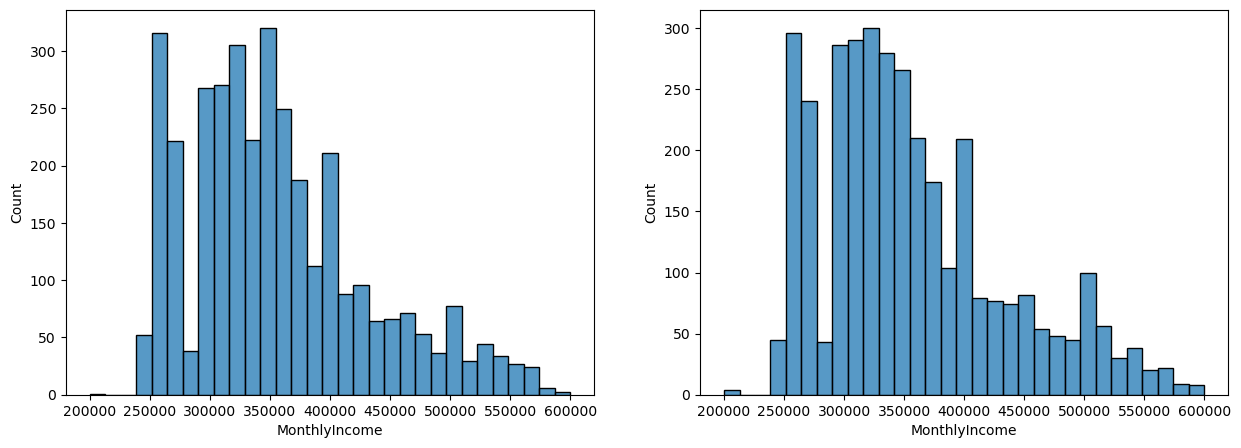

In [55]:
# MonthlyIncome Normalization
# 顧客の月収
# 性別で重み

df_train['MonthlyIncome'] = df_train['MonthlyIncome'].apply(normalize_monthly_income)
df_test['MonthlyIncome'] = df_test['MonthlyIncome'].apply(normalize_monthly_income)

df_train['MonthlyIncome'] = df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median())
df_test['MonthlyIncome'] = df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_list = [df_train, df_test]
for i, df in enumerate(df_list):
    sns.histplot(df['MonthlyIncome'], ax=axes[i])

In [57]:
# customer_info Normalization
# 顧客の情報のメモ(婚姻状況や車の有無、旅行への子どもの同伴の有無)

df_train[['Marry', 'Car', 'Child']] = df_train['customer_info'].apply(divide_customer_info)
df_test[['Marry', 'Car', 'Child']] = df_test['customer_info'].apply(divide_customer_info)

df_train['Marry'] = df_train['Marry'].apply(normalize_info_1)
df_test['Marry'] = df_test['Marry'].apply(normalize_info_1)
df_train['Car'] = df_train['Car'].apply(normalize_info_2)
df_test['Car'] = df_test['Car'].apply(normalize_info_2)
df_train['Child'] = df_train['Child'].apply(normalize_info_3)
df_test['Child'] = df_test['Child'].apply(normalize_info_3)

In [58]:
print('Train', df_train['Marry'].unique())
print('Test', df_test['Marry'].unique())
display(df_train.groupby(by=['Marry'])['ProdTaken'].agg(['mean', 'count']))

Train ['Single' 'Divorced' 'Married']
Test ['Married' 'Divorced' 'Single']


,mean,count
Marry,,
Divorced,0.116173,878
Married,0.098266,1384
Single,0.211084,1227


In [59]:
print('Train', df_train['Car'].unique())
print('Test', df_test['Car'].unique())
display(df_train.groupby(by=['Car'])['ProdTaken'].agg(['mean', 'count']))

Train ['No Car' 'Has Car']
Test ['Has Car' 'No Car']


,mean,count
Car,,
Has Car,0.120305,1704
No Car,0.163585,1785


In [60]:
print('Train', df_train['Child'].unique())
print('Test', df_test['Child'].unique())
display(df_train.groupby(by=['Child'])['ProdTaken'].agg(['mean', 'count']))

Train ['0_child' '1_child' '2_child' '3_child']
Test ['0_child' '1_child' '2_child' '3_child']


,mean,count
Child,,
0_child,0.209393,1022
1_child,0.117971,1636
2_child,0.114024,763
3_child,0.044118,68


In [61]:
drop_list = ['id', 'customer_info']

df_train = df_train.drop(columns=drop_list)
df_test = df_test.drop(columns=drop_list)

In [62]:
df_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,ProdTaken,Marry,Car,Child
0,50,Self Enquiry,2,900.0,Large Business,male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905.0,1,Single,No Car,0_child
1,56,Company Invited,1,840.0,Salaried,male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475.0,0,Divorced,Has Car,0_child
2,38,Self Enquiry,1,600.0,Large Business,female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,1,Married,No Car,0_child
3,37,Self Enquiry,2,1080.0,Small Business,female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805.0,0,Divorced,Has Car,0_child
4,48,Company Invited,3,1020.0,Small Business,female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435.0,1,Single,Has Car,0_child


In [63]:
df_test.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,Marry,Car,Child
0,48,Self Enquiry,2,780.0,Small Business,male,1.0,4.0,Super Deluxe,3.0,7,0,3,AVP,496950.0,Married,Has Car,0_child
1,30,Self Enquiry,2,720.0,Small Business,female,1.0,4.0,Standard,3.0,4,1,3,Senior Manager,300000.0,Married,No Car,0_child
2,25,Self Enquiry,1,540.0,Salaried,female,1.0,4.0,Basic,3.0,1,0,3,Executive,260000.0,Divorced,No Car,0_child
3,21,Company Invited,2,420.0,Salaried,male,1.0,4.0,Basic,4.0,1,0,3,Senior Manager,259875.0,Divorced,Has Car,0_child
4,41,Company Invited,1,420.0,Salaried,male,1.0,4.0,Basic,3.0,1,0,4,Executive,268830.0,Single,Has Car,0_child


In [64]:
df_train.to_csv('data/collect/before_labeled/train_gbdt_before_labeled.csv', index=False)
df_test.to_csv('data/collect/before_labeled/test_gbdt_before_labeled.csv', index=False)

## Labeling

In [66]:
df_train = pd.read_csv('data/collect/before_labeled/train_gbdt_before_labeled.csv')
df_test = pd.read_csv('data/collect/before_labeled/test_gbdt_before_labeled.csv')

In [70]:
# TypeofContact labeling

mapping = {
    'No': 0,
    'Self Enquiry': 1,
    'Company Invited': 2
}

df_train.loc[:, 'TypeofContact'] = df_train.loc[:, 'TypeofContact'].map(mapping)
df_test.loc[:, 'TypeofContact'] = df_test.loc[:, 'TypeofContact'].map(mapping)

In [72]:
# Occupation labeling

mapping = {
    'Salaried': 0,
    'Small Business': 1,
    'Large Business': 2
}

df_train.loc[:, 'Occupation'] = df_train.loc[:, 'Occupation'].map(mapping)
df_test.loc[:, 'Occupation'] = df_test.loc[:, 'Occupation'].map(mapping)

In [73]:
# Gender labeling

mapping = {
    'male': 0,
    'female': 1
}

df_train.loc[:, 'Gender'] = df_train.loc[:, 'Gender'].map(mapping)
df_test.loc[:, 'Gender'] = df_test.loc[:, 'Gender'].map(mapping)

In [74]:
# ProductPitched labeling

mapping = {
    'Super Deluxe': 0,
    'Standard': 1,
    'King': 2,
    'Deluxe': 3,
    'Basic': 4
}

df_train.loc[:, 'ProductPitched'] = df_train.loc[:, 'ProductPitched'].map(mapping)
df_test.loc[:, 'ProductPitched'] = df_test.loc[:, 'ProductPitched'].map(mapping)

In [75]:
# Designation labeling

mapping = {
    'Manager': 0,
    'VP': 1,
    'AVP': 2,
    'Senior Manager': 3,
    'Executive': 4
}

df_train.loc[:, 'Designation'] = df_train.loc[:, 'Designation'].map(mapping)
df_test.loc[:, 'Designation'] = df_test.loc[:, 'Designation'].map(mapping)

In [76]:
# Marry labeling

mapping = {
    'Married': 0,
    'Single': 1,
    'Divorced': 2,
}

df_train.loc[:, 'Marry'] = df_train.loc[:, 'Marry'].map(mapping)
df_test.loc[:, 'Marry'] = df_test.loc[:, 'Marry'].map(mapping)

In [77]:
# Car labeling

mapping = {
    'No Car': 0,
    'Has Car': 1,
}

df_train.loc[:, 'Car'] = df_train.loc[:, 'Car'].map(mapping)
df_test.loc[:, 'Car'] = df_test.loc[:, 'Car'].map(mapping)

In [78]:
# Child labeling

mapping = {
    '0_child': 0,
    '1_child': 1,
    '2_child': 2,
    '3_child': 3
}

df_train.loc[:, 'Child'] = df_train.loc[:, 'Child'].map(mapping)
df_test.loc[:, 'Child'] = df_test.loc[:, 'Child'].map(mapping)

In [79]:
column_list_train = df_train.columns
column_list_test = df_test.columns

for col in column_list_train:
    df_train[col] = df_train[col].astype(int)

for col in column_list_test:
    df_test[col] = df_test[col].astype(int)

In [81]:
df_train.to_csv('data/collect/labeled/train_gbdt_labeled.csv', index=False)
df_test.to_csv('data/collect/labeled/test_gbdt_labeled.csv', index=False)

# Feature Engineering